## 1. Google Play Store apps and reviews
<p>In this notebook, we will analyze over ten thousand apps from the Google Play Store. There are two datasets:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [2]:
# Read the dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ',apps.shape[0])

# Check the first five rows
print(apps.head(5))

Total number of apps in the dataset =  9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1 

## 2. Data cleaning
<p>It is observed that some entries in the columns (e.g. <code>Installs</code> and <code>Price</code>) have some non-numeric characters, such as <code>+</code> <code>,</code> and <code>$</code>. Hence, it is necessary to clean our data as this may hinder the future computations.</p>

In [3]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column and character in cols_to_clean and chars_to_remove; replace the character with an empty string
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Correcting data types
<p>As <code>Installs</code> and <code>Price</code> are categorized as <code>object</code> data type (not <code>int</code> or <code>float</code>), we have to correct these data types to make them numeric.</p>

In [4]:
import numpy as np

# Convert Installs and Price to float data type
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


## 4. Exploring app categories
<p>Three main questions could be answered: </p>
<ul>
<li>Which two categories have the highest share of apps in the market?   <b>Family and Game</b></li> 
<li>Is any specific category dominating the market?    <b>Family</b></li>
<li>Which categories have the fewest number of apps?   <b>Beauty</b></li>
</ul>

In [5]:
#pip install C:\Users\Michael\Downloads\plotly-3.5.0-py2.py3-none-any.whl

In [6]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## 5. Distribution of app ratings
<p>App ratings (on a scale of 1 to 5) are a key performance indicator of an app. It is found that the average volume of ratings across all app categories is <b>4.17</b>. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

In [7]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 6. Size and price of an app
<p>For the user experience, if the mobile app is too large, it may be impatient/difficult for users to download (lengthy download times and finite amount of disk space). Also, in terms of the price of an app, most users expect their apps to be free or inexpensive.</p>

<p>To come up with a business strategy, it is interesting to answer the following questions:</p>
<ul>
<li>Does the size of an app affect its rating?   <b>Majority of top rated apps (rating > 4) range from 2 MB to 20 MB</b></li> 
<li>Do users prefer light-weighted apps?   <b>Size with the range from 2 MB to 20MB</b></li>
<li>Does the price of an app affect its rating?   <b>No significant difference</b></li>
<li>Do users always prefer free apps over paid apps?   <b>Yes, or under $10</b></li>
</ul>

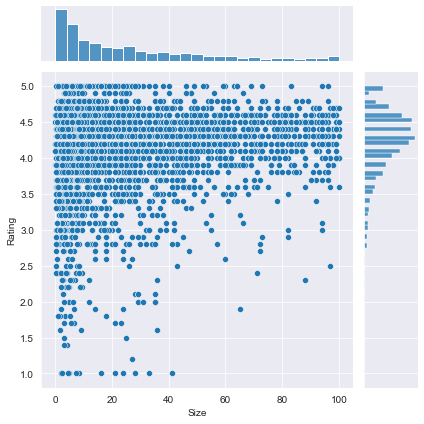

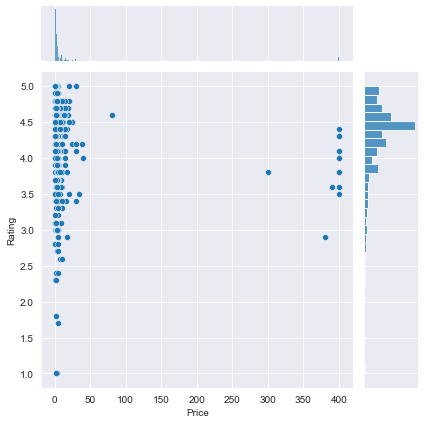

In [8]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are not null
apps_with_size_and_rating_present = apps[apps['Rating'].notnull() & apps['Size'].notnull()]

# Choose the app categories that have at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(apps['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relation between app category and app price
<p>There are many factors to consider when selecting the right pricing strategy for the mobile app. It is important to consider the willingness of your customer to pay for your app. Different categories demand different price ranges. Some apps that are simple and used daily, such as calculator app, should probably be kept free.Below, we could see that <b>Medical</b> and <b>Family</b> apps are the most expensive. Some medical apps extend even up to \$80. All <b>Game</b> apps are priced below \$20.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


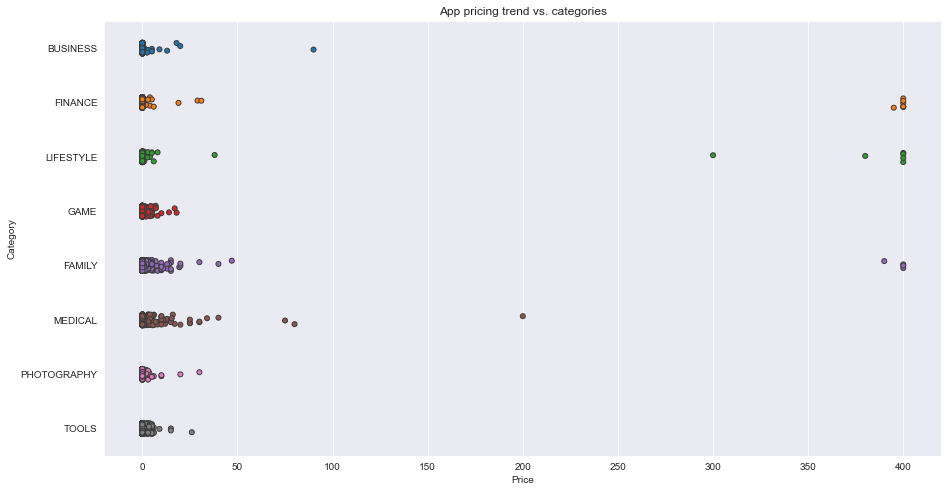

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select some popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Plotting Price vs Category to see the price trend
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend vs. categories')

# Apps which Price greater than 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filter out "I am rich" apps
<p>A bunch of "I am rich" apps could be discovered. We may expect that these apps are "junk" apps. Now, it is essential to filter out these apps and re-do the visualization.</p>

Text(0.5, 1.0, 'App pricing vs. categories (after filtering)')

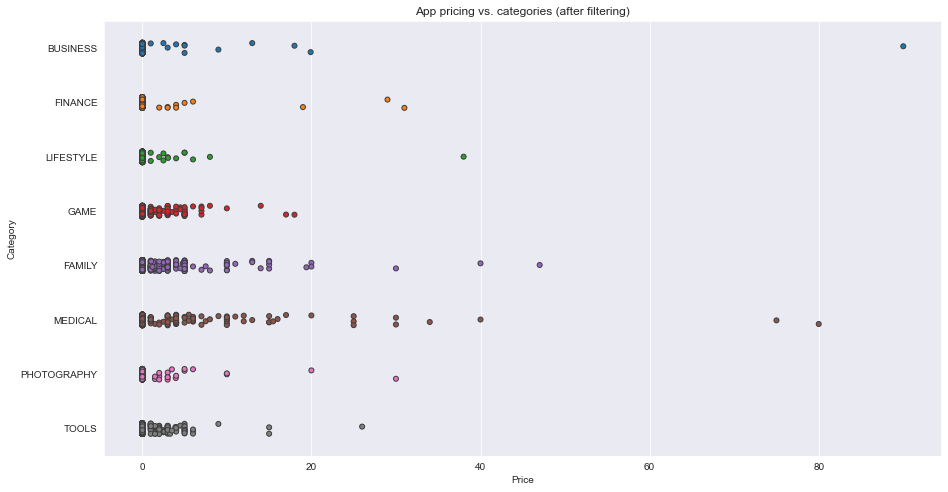

In [10]:
# Apps which Price lower than 100
apps_under_100 = popular_app_cats [popular_app_cats ['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100['Price'], y = apps_under_100['Category'], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing vs. categories (after filtering)')

## 9. Popularity of paid apps vs. free apps
<p>For apps in the Play Store, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. </p>
<p>There are some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Major income often comes from advertisements.</li>
<li>Usually created by companies that have other products and the app serves as an extension/support of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>For the paid apps:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user do not like it before buying it as it costs money.</li>
</ul>
<p>It is important to ask: Are paid apps installed as much as free apps?   <b>Yes, relatively lower than free apps</b></p>

In [11]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 10. Sentiment analysis of user reviews
<p>Inside the data of <code>user_reviews.csv</code>, a sentiment analysis is already provided. User reviews can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'great', and 'love'. Negative words might include 'dislike', 'hate', 'problem', 'refund', and 'incompetent'.</p>

<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we could observe that <b>free apps</b> receive <b>a lot of harsh comments</b>, as indicated by the outliers on the negative y-axis. Reviews for <b>paid apps</b> appear <b>never</b> to be <b>extremely negative</b>. The median polarity score for paid apps is slightly higher than free apps, thereby syncing with our previous observation.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

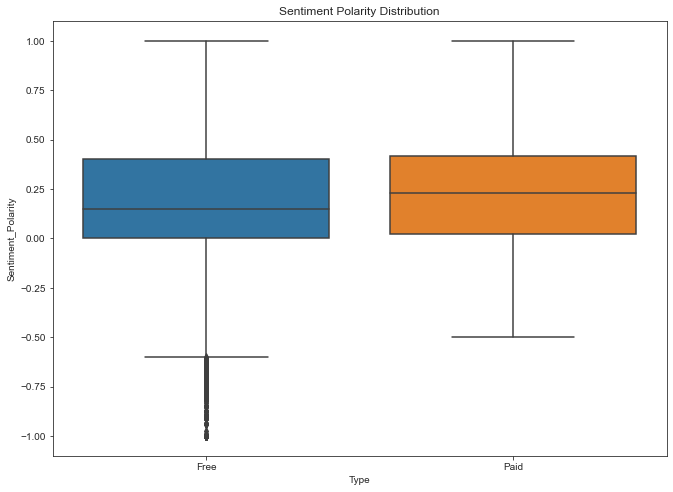

In [13]:
# Read the dataset
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = apps.merge(reviews_df, on='App')

# Drop null values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')